# Superdense Coding

In this notebook, we will implement superdense coding based on a [Qiskit tutorial].

Superdense coding is conceptual closely related to quantum teleportation, the difference is that one uses the entangled qubit pair to send a classical message.

[1]: https://qiskit.org/textbook/ch-algorithms/superdense-coding.html

Eve prepares an entangled state,

$$
\vert\Phi\rangle=\frac{\vert00\rangle+\vert11\rangle}{\sqrt{2}},
$$

by applying a Hadamard gate to the first qubit, followed by a CNOT gate targetting the second qubit controlled by the first qubit.
Thereafter, Eve sends one of the entangled pair of qubits to Alice and the other one to Bob.

Depending on the bits Alice wants to transmit to Bob, she applies a quantum operation on her qubit,

| Bits | Operator $X$ | New state $\vert\Psi\rangle=(X\otimes1)\vert\Phi\rangle$ |
|-|-|-|
| 00 | $1$ | $\left(\vert00\rangle+\vert11\rangle\right)/\sqrt{2}$ |
| 01 | $\sigma_x$ | $\left(\vert01\rangle+\vert10\rangle\right)/\sqrt{2}$ |
| 10 | $\sigma_z$ | $\left(\vert00\rangle-\vert11\rangle\right)/\sqrt{2}$ |
| 11 | $\sigma_z\sigma_x$ | $\left(\vert01\rangle-\vert10\rangle\right)/\sqrt{2}$

and sends her qubit to Bob. Bob receives Alice's qubit and decodes it by appliying first a CNOT and then a Hadamard operation,

| Bits | Received state $\vert\Psi\rangle$ | New state $(H\otimes1)C_X\vert\Psi\rangle$ |
|-|-|-|
| 00 | $\left(\vert00\rangle+\vert11\rangle\right)/\sqrt{2}$ | $H\frac{\vert00\rangle+\vert10\rangle}{\sqrt{2}}=\vert00\rangle$ |
| 01 | $\left(\vert01\rangle+\vert10\rangle\right)/\sqrt{2}$ | $H\frac{\vert01\rangle+\vert11\rangle}{\sqrt{2}}=\vert01\rangle$ |
| 10 | $\left(\vert00\rangle-\vert11\rangle\right)/\sqrt{2}$ | $H\frac{\vert00\rangle-\vert10\rangle}{\sqrt{2}}=\vert10\rangle$ |
| 11 | $\left(\vert01\rangle-\vert10\rangle\right)/\sqrt{2}$ | $H\frac{\vert01\rangle-\vert11\rangle}{\sqrt{2}}=\vert11\rangle$ |

wherein we have used,

$$
\begin{align}
C_X\vert00\rangle=\vert00\rangle, &&
C_X\vert01\rangle=\vert01\rangle, &&
C_X\vert10\rangle=\vert11\rangle, &&
C_X\vert11\rangle=\vert10\rangle.
\end{align}
$$

In [6]:
import numpy as np
import qiskit as qk

def superdense_coding_circuit(bits):
    qr = qk.QuantumRegister(2)
    cr = qk.ClassicalRegister(2)
    qc = qk.QuantumCircuit(qr, cr)

    # create entangled pair of qubits
    qc.h(qr[0])
    qc.cx(qr[0], qr[1])
    qc.barrier()

    # Alice encodes the bits into her qubit
    if bits == "01":
        qc.x(qr[0])
    if bits == "10":
        qc.z(qr[0])
    if bits == "11":
        qc.z(qr[0])
        qc.x(qr[0])
    qc.barrier()

    # Bob decodes her qubit
    qc.cx(qr[0], qr[1])
    qc.h(qr[0])
    qc.barrier()

    # Bob measures the qubit
    qc.measure(qr[0], cr[0])
    qc.measure(qr[1], cr[1])
    
    return qc

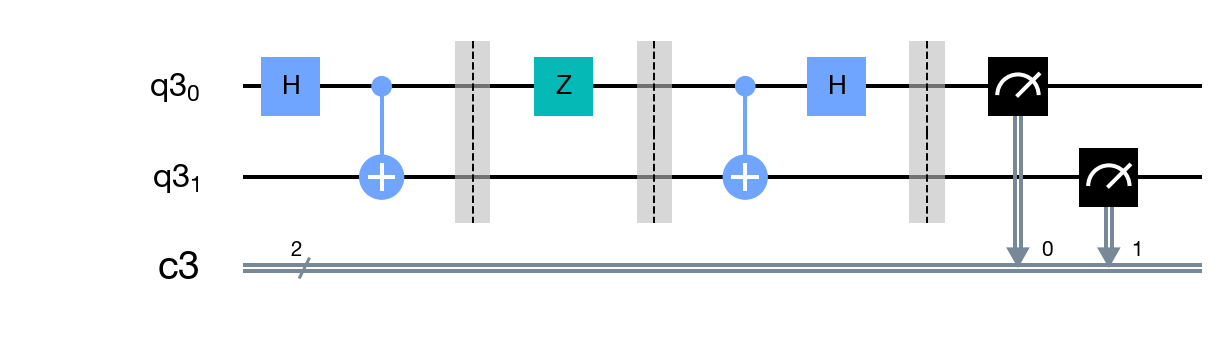

In [8]:
superdense_coding_circuit("10").draw(output="mpl")

In [11]:
backend = qk.Aer.get_backend('qasm_simulator')

def simulate(qc):
    return qk.execute(qc, backend, shots=1024).result().get_counts()

[simulate(superdense_coding_circuit(bits)) for bits in ["00", "01", "10", "11"]]

[{'00': 1024}, {'10': 1024}, {'01': 1024}, {'11': 1024}]